In [1]:
import sys

In [10]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import librosa

from tensorflow import keras
from __future__ import absolute_import, division, print_function
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#Libraries helping with file retrival
import os
from os import listdir
from os.path import isfile, join

#Visualization and data manipulation libraries
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns

#to save trained models
import joblib
import json

In [19]:
import random                        # for generating random numbers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential  # Model type to be used
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
df = pd.read_pickle('train.pkl')
train_data = df['data'].values
train_target = df['target'].values

In [12]:
df = pd.read_pickle('test.pkl')  # test set path
test_data = df['data'].values

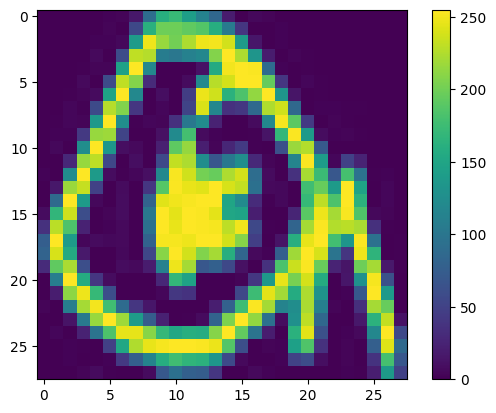

In [5]:
plt.figure()
plt.imshow(train_data[13])
plt.colorbar()
plt.grid(False)
plt.show()

In [38]:


model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(28, 28, 1)),
    keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100),
    keras.layers.Dense(100,activation=tf.nn.softmax)
])

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
train_data = np.array([np.array(val) for val in train_data])
# train_data = train_data / 255.0

In [41]:
model.fit(train_data, train_target, epochs=10)

Epoch 1/10


2022-12-03 22:50:25.194574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15625/15625 [==============================] - 244s 16ms/step - loss: 1.6354 - accuracy: 0.5826
Epoch 2/10
15625/15625 [==============================] - 242s 15ms/step - loss: 1.2722 - accuracy: 0.6666
Epoch 3/10
15625/15625 [==============================] - 244s 16ms/step - loss: 1.1730 - accuracy: 0.6899
Epoch 4/10
15625/15625 [==============================] - 243s 16ms/step - loss: 1.1150 - accuracy: 0.7034
Epoch 5/10
15625/15625 [==============================] - 244s 16ms/step - loss: 1.0725 - accuracy: 0.7140
Epoch 6/10
15625/15625 [==============================] - 251s 16ms/step - loss: 1.0361 - accuracy: 0.7221
Epoch 7/10
15625/15625 [==============================] - 256s 16ms/step - loss: 1.0072 - accuracy: 0.7286
Epoch 8/10
15625/15625 [==============================] - 244s 16ms/step - loss: 0.9824 - accuracy: 0.7341
Epoch 9/10
15625/15625 [==============================] - 243s 16ms/step - loss: 0.9612 - accuracy: 0.7388
Epoch 10/10
15625/15625 [=======================

In [42]:
model.fit(train_data, train_target, epochs=10)

Epoch 1/10
15625/15625 [==============================] - 243s 16ms/step - loss: 0.9249 - accuracy: 0.7470
Epoch 2/10
15625/15625 [==============================] - 247s 16ms/step - loss: 0.9096 - accuracy: 0.7502
Epoch 3/10
15625/15625 [==============================] - 246s 16ms/step - loss: 0.8962 - accuracy: 0.7530
Epoch 4/10
15625/15625 [==============================] - 263s 17ms/step - loss: 0.8818 - accuracy: 0.7562
Epoch 5/10
15625/15625 [==============================] - 252s 16ms/step - loss: 0.8697 - accuracy: 0.7591
Epoch 6/10
15625/15625 [==============================] - 249s 16ms/step - loss: 0.8590 - accuracy: 0.7604
Epoch 7/10
15625/15625 [==============================] - 239s 15ms/step - loss: 0.8471 - accuracy: 0.7638
Epoch 8/10
15625/15625 [==============================] - 254s 16ms/step - loss: 0.8378 - accuracy: 0.7666
Epoch 9/10
15625/15625 [==============================] - 251s 16ms/step - loss: 0.8300 - accuracy: 0.7678
Epoch 10/10
15625/15625 [============

In [43]:
model.fit(train_data, train_target, epochs=10)

Epoch 1/10
15625/15625 [==============================] - 253s 16ms/step - loss: 0.8117 - accuracy: 0.7714
Epoch 2/10
15625/15625 [==============================] - 248s 16ms/step - loss: 0.8034 - accuracy: 0.7735
Epoch 3/10
15625/15625 [==============================] - 260s 17ms/step - loss: 0.7939 - accuracy: 0.7757
Epoch 4/10
15625/15625 [==============================] - 255s 16ms/step - loss: 0.7889 - accuracy: 0.7765
Epoch 5/10
15625/15625 [==============================] - 245s 16ms/step - loss: 0.7811 - accuracy: 0.7786
Epoch 6/10
15625/15625 [==============================] - 240s 15ms/step - loss: 0.7747 - accuracy: 0.7802
Epoch 7/10
15625/15625 [==============================] - 242s 15ms/step - loss: 0.7691 - accuracy: 0.7814
Epoch 8/10
15625/15625 [==============================] - 241s 15ms/step - loss: 0.7615 - accuracy: 0.7823
Epoch 9/10
15625/15625 [==============================] - 241s 15ms/step - loss: 0.7572 - accuracy: 0.7829
Epoch 10/10
15625/15625 [============